# PERSONA

Persona.csv veriseti uluslararası bir oyun şirketinin sattığı ürünlerin fiyatlarını ve bu ürünleri satınalan kullanıcıların bazı demografik bilgilerini barındırmaktadır. 

#Veriseti her satış işleminde oluşan kayıtlardan meydana gelmektedir. Bunun anlamı tablo tekilleştirilmemiştir. Diğer bir ifade ile belirli demografik özelliklere sahip bir kullanıcı birden fazla alışveriş yapmış olabilir.

DEĞİŞKENLER


* PRICE
* SOURCE
* SEX
* COUNTRY
* AGE 
  

In [1]:
# import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.simplefilter(action="ignore")

In [2]:
# rows and columns settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.float_format", lambda x: '%.2f' % x)

In [3]:
# loading the dataset
df = pd.read_csv("/kaggle/input/persona/persona.csv")

In [4]:
df.head()

,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


# Exploratory Data Analysis**

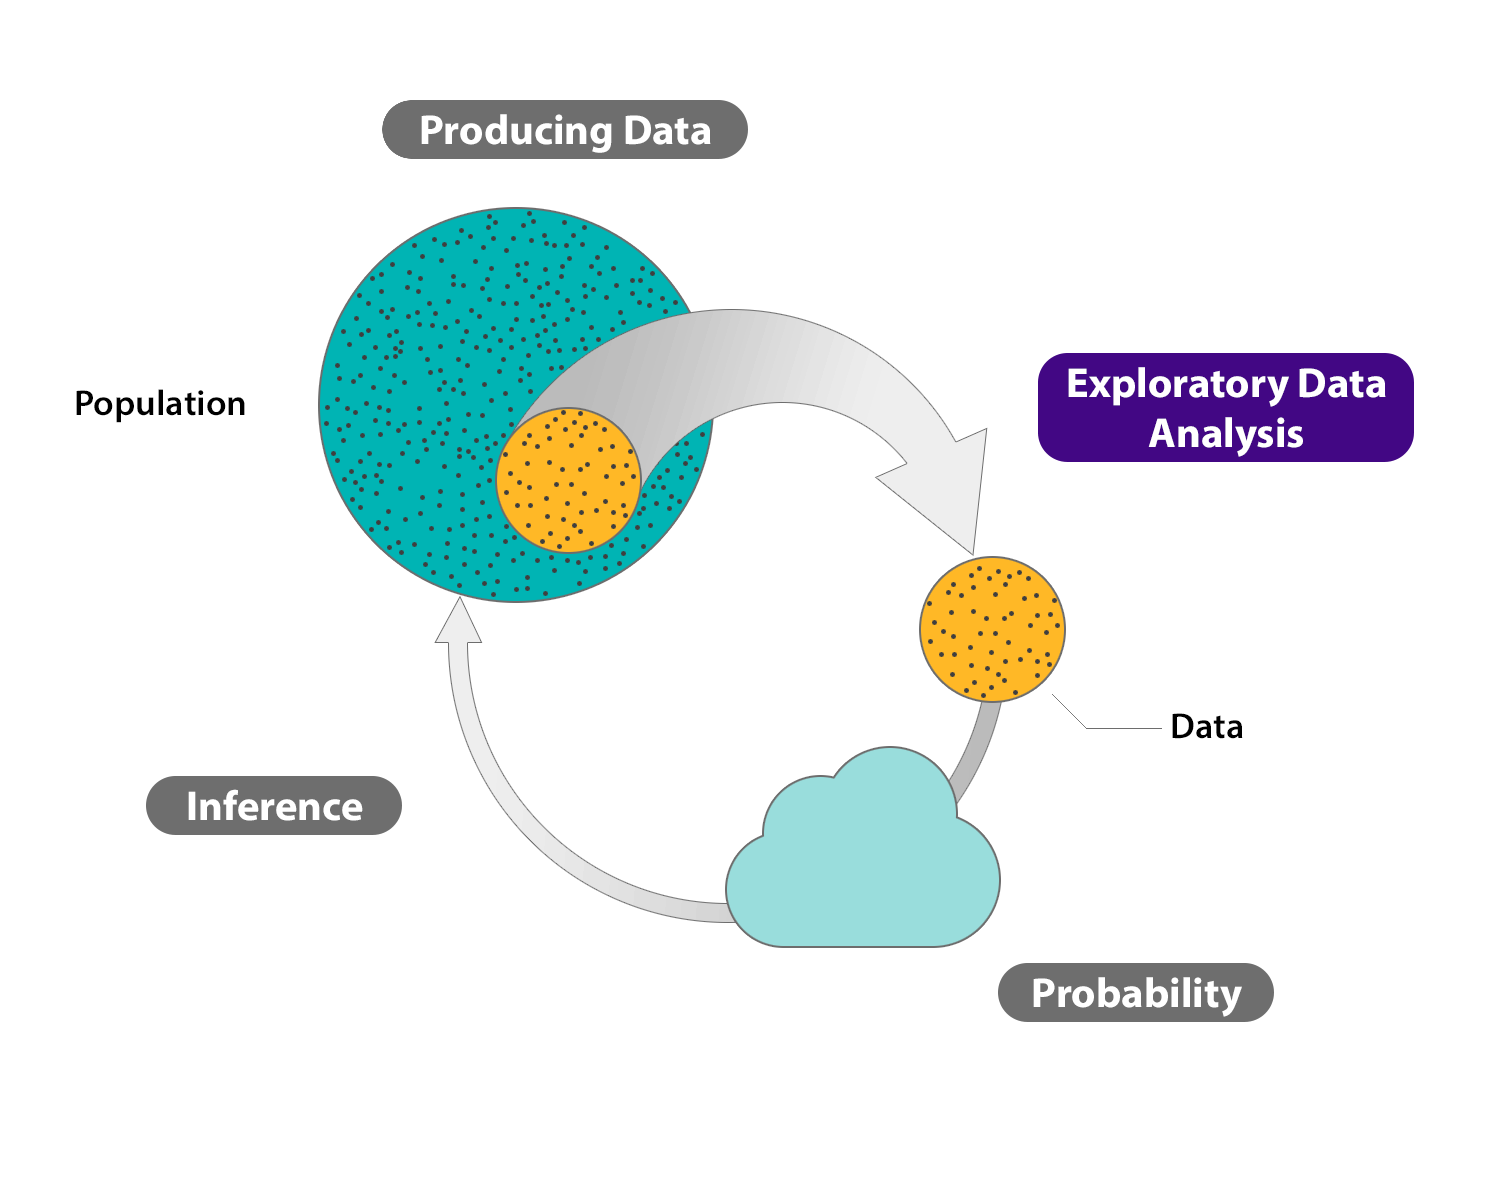

*#Exploratory data analysis is the initial stage of data analysis that focuses on discovering patterns, relationships, and trends in the data. EDA involves the use of visual and statistical methods to explore and summarize the data, and to generate hypotheses that can be further tested using more advanced statistical techniques.***

In [5]:
# writing a function to look at the overall picture
def check_df(dataframe, head=5):
    print('##################### Shape #####################')
    print(dataframe.shape)
    print('##################### Types #####################')
    print(dataframe.dtypes)
    print('##################### Head #####################')
    print(dataframe.head(head))
    print('##################### Tail #####################')
    print(dataframe.tail(head))
    print('##################### NA #####################')
    print(dataframe.isnull().sum())
    print('##################### Quantiles #####################')
    print(dataframe.describe([0, 0.05, 0.50, 0.95, 0.99, 1]).T)

In [6]:
check_df(df)

##################### Shape #####################
(5000, 5)
##################### Types #####################
PRICE       int64
SOURCE     object
SEX        object
COUNTRY    object
AGE         int64
dtype: object
##################### Head #####################
   PRICE   SOURCE   SEX COUNTRY  AGE
0     39  android  male     bra   17
1     39  android  male     bra   17
2     49  android  male     bra   17
3     29  android  male     tur   17
4     49  android  male     tur   17
##################### Tail #####################
      PRICE   SOURCE     SEX COUNTRY  AGE
4995     29  android  female     bra   31
4996     29  android  female     bra   31
4997     29  android  female     bra   31
4998     39  android  female     bra   31
4999     29  android  female     bra   31
##################### NA #####################
PRICE      0
SOURCE     0
SEX        0
COUNTRY    0
AGE        0
dtype: int64
##################### Quantiles #####################
        count  mean   std   min    

In [7]:
# average price analysis
agg_df = df.groupby(["COUNTRY", "SOURCE", "SEX", "AGE"]).agg({"PRICE": "mean"}).sort_values("PRICE", ascending=False)


In [8]:
agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.00
usa,android,male,36,59.00
fra,android,female,24,59.00
usa,ios,male,32,54.00
deu,android,female,36,49.00


In [9]:
df["PRICE"].nunique()

6

In [10]:
# Converting the names in the index to variable names.
agg_df = agg_df.reset_index()

# Analysis of Categorical variables

In [11]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Returns the names of categorical, numeric and categorical but cardinal variables in the data set.
    Note Categorical variables include categorical variables with numeric appearance.
    Parameters
    ------
         dataframe: dataframe
                Dataframe to get variable names
        cat_th: int, optional
                class threshold for numeric but categorical variables
        car_th: int, optinal
                class threshold for categorical but cardinal variables
    Returns
    ------
        cat_cols: list
                Categorical variable list
        num_cols: list
                Numeric variable list
        cat_but_car: list
                List of cardinal variables with categorical view
    Examples
    ------
        import seaborn as sns
        df = sns.load_dataset("iris")
        print(grab_col_names(df))
    Notes
    ------
        cat_cols + num_cols + cat_but_car = total number of variables
        num_but_cat is inside cat_cols.
        The sum of the 3 return lists equals the total number of variables: cat_cols + num_cols + cat_but_car = number of variables
    """

    # cat_cols, cat_but_car
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == 'O']
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and
                   dataframe[col].dtypes != 'O']
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and
                   dataframe[col].dtypes == 'O']
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != 'O']
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f'Observations: {dataframe.shape[0]}')
    print(f'Variables: {dataframe.shape[1]}')
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car, num_but_cat

In [12]:
cat_cols, num_cols, cat_but_car, num_but_cat = grab_col_names(df)

Observations: 5000
Variables: 5
cat_cols: 4
num_cols: 1
cat_but_car: 0
num_but_cat: 1


In [13]:
cat_cols

['SOURCE', 'SEX', 'COUNTRY', 'PRICE']

In [14]:
num_cols

['AGE']

In [15]:
cat_but_car

[]

In [16]:
num_but_cat

['PRICE']

# Categorical Variable Analysis

         SOURCE  Ratio
SOURCE                
android    2974  59.48
ios        2026  40.52
##########################################


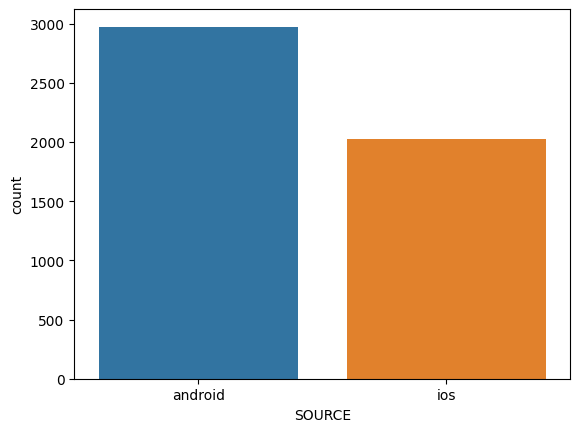

         SEX  Ratio
SEX                
female  2621  52.42
male    2379  47.58
##########################################


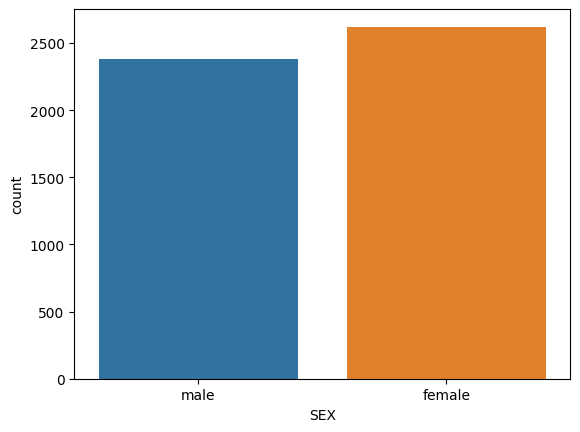

         COUNTRY  Ratio
COUNTRY                
usa         2065  41.30
bra         1496  29.92
deu          455   9.10
tur          451   9.02
fra          303   6.06
can          230   4.60
##########################################


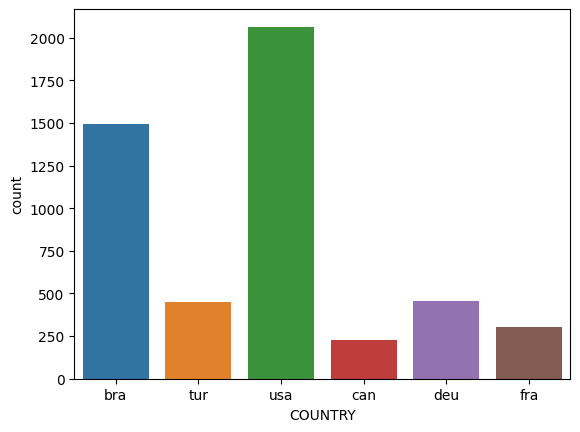

       PRICE  Ratio
PRICE              
29      1305  26.10
39      1260  25.20
49      1031  20.62
19       992  19.84
59       212   4.24
9        200   4.00
##########################################


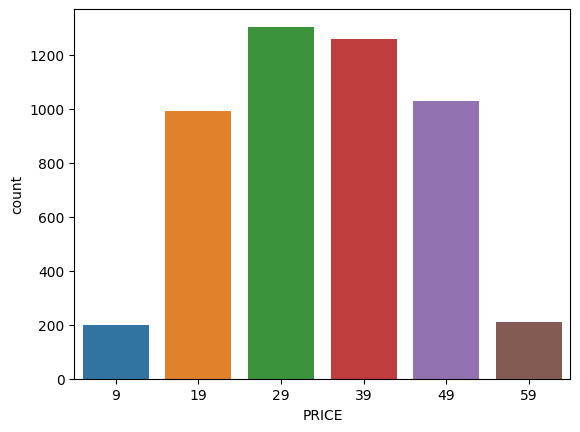

In [17]:
def cat_summary(dataframe, col_name, plot=False):
    print(pd.DataFrame({col_name: dataframe[col_name].value_counts(),
                        'Ratio': 100 * dataframe[col_name].value_counts() / len(dataframe)}))
    print('##########################################')
    if plot:
        sns.countplot(x=dataframe[col_name], data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    cat_summary(df, col, plot=True)

# Analysis of Numerical variables

count   5000.00
mean      23.58
std        9.00
min       15.00
5%        15.00
10%       15.00
20%       16.00
30%       17.00
40%       19.00
50%       21.00
60%       23.00
70%       26.00
80%       30.00
90%       36.00
95%       43.00
99%       53.00
max       66.00
Name: AGE, dtype: float64


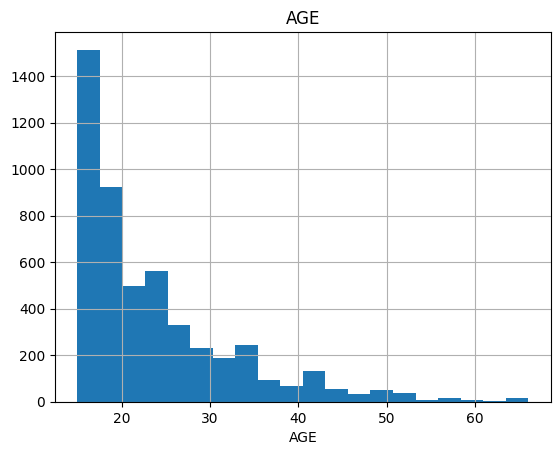

In [18]:
def num_summary(dataframe, numerical_col, plot=False):
    quantiles = [0.05, 0.10, 0.20, 0.30, 0.40, 0.50, 0.60, 0.70, 0.80, 0.90, 0.95, 0.99]
    print(dataframe[numerical_col].describe(quantiles).T)

    if plot:
        dataframe[numerical_col].hist(bins=20)
        plt.xlabel(numerical_col)
        plt.title(numerical_col)
        plt.show(block=True)

for col in num_cols:
    num_summary(df, col, plot=True)

# Analysis of Target Variables

         TARGET_MEAN
SOURCE              
android        34.17
ios            34.07




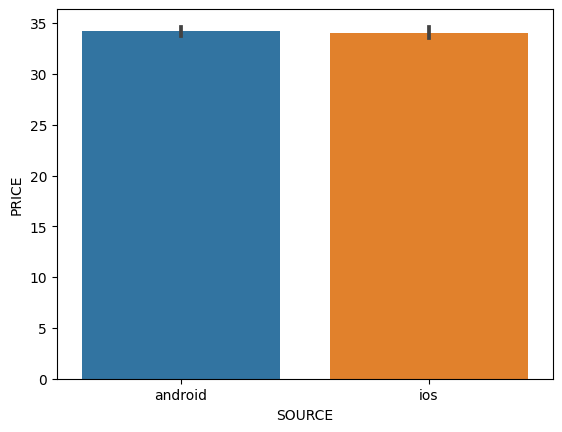

        TARGET_MEAN
SEX                
female        33.95
male          34.33




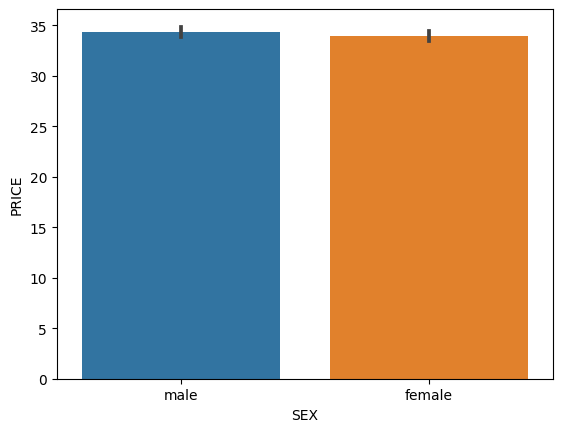

         TARGET_MEAN
COUNTRY             
bra            34.33
can            33.61
deu            34.03
fra            33.59
tur            34.79
usa            34.01




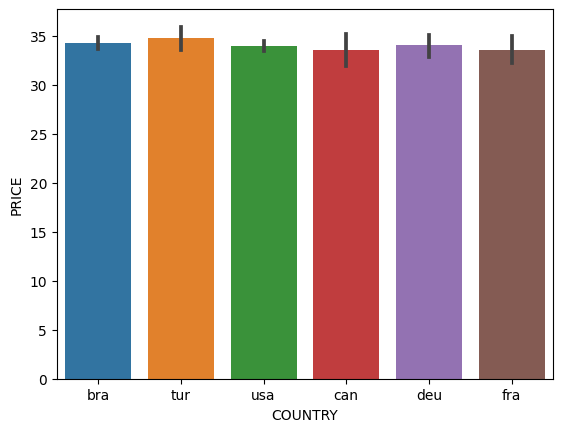

       TARGET_MEAN
PRICE             
9             9.00
19           19.00
29           29.00
39           39.00
49           49.00
59           59.00




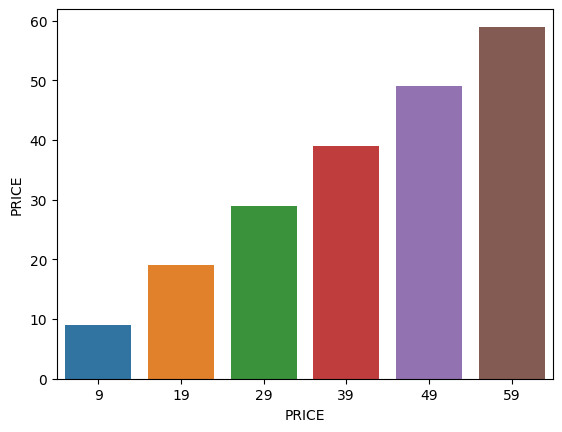

In [19]:
def target_summary_with_cat(dataframe, target, categorical_col, plot=False):
    print(pd.DataFrame({'TARGET_MEAN': dataframe.groupby(categorical_col)[target].mean()}), end='\n\n\n')
    if plot:
        sns.barplot(x=categorical_col, y=target, data=dataframe)
        plt.show(block=True)

for col in cat_cols:
    target_summary_with_cat(df, 'PRICE', col, plot=True)